In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.style.use("seaborn")

GRID_SIZE = np.zeros((7,10))

ACTIONS = np.array([[-1, 0],   #0 up
                    [1, 0],    #1 down
                    [0, -1],   #2 left
                    [0, 1]])   #3 right

actions = np.arange(4)   #represent ACTIONS

STEP_SIZE = 0.2

DISCOUNT_RATE = 1

WIND_STRENGTH = [0,0,0,1,1,1,2,2,1,0]

TARGET = np.array([3,7])
class Environment:
    def __init__(self):
        self.state = np.array([3,0])
        self.next_state = None
        self.action = np.random.choice(actions)
    
    def act_action(self,Action):
        pos = self.state + Action
        pos[0] -= WIND_STRENGTH[self.state[1]]

        for i in range(len(pos)):
            if pos[i] < 0:
                pos[i] = max(0,pos[i])
            else:
                pos[i] = min(GRID_SIZE.shape[i]-1,pos[i])
        self.next_state = pos
        if (pos == TARGET).all():
            return 1
        else:
            return -1
        

In [2]:
def ε_greedy_policy(t,pos,Q_table):
    random_num = np.random.rand(1)
    if random_num > max(0.2,1/t):       #exploitation
        return np.argmax(Q_table[:,pos[0],pos[1]])
    else:                               #exploration
        return np.random.choice(actions)

In [3]:
Q_table = np.zeros((4,7,10))
steps = []
step = 0
#Sarsa (on-policy TD control)
for t in tqdm(range(1,1001)):
    actor = Environment()  #episode start
    actor.action = ε_greedy_policy(t,actor.state,Q_table)
    steps.append(step)
    step = 0
    while (actor.state == TARGET).all() == False:
        step += 1
        reward = actor.act_action(ACTIONS[actor.action])
        next_action = ε_greedy_policy(t,actor.next_state,Q_table)
        Q_table[actor.action,actor.state[0],actor.state[1]] += STEP_SIZE * (
            reward + DISCOUNT_RATE * Q_table[next_action,actor.next_state[0],actor.next_state[1]] - \
            Q_table[actor.action,actor.state[0],actor.state[1]]) 
        #print(actor.state,actor.next_state,actor.action)
        actor.state = actor.next_state
        actor.action = next_action
               

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1007.93it/s]


Text(0, 0.5, 'steps')

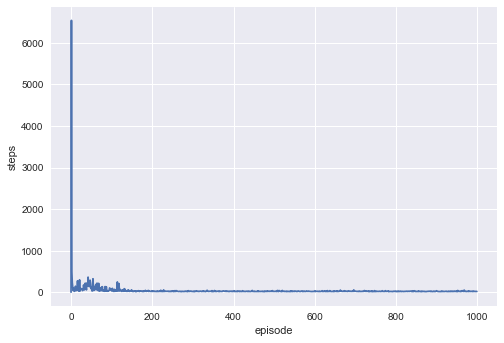

In [4]:
plt.plot(range(len(steps)),steps,'-')
plt.xlabel('episode')
plt.ylabel('steps')

In [5]:
# display the optimal policy
optimal_policy = []
for i in range(0, 7):
    optimal_policy.append([])
    for j in range(0, 10):
        if ([i, j] == TARGET).all():
            optimal_policy[-1].append('G')
            continue
        bestAction = np.argmax(Q_table[:, i, j])
        if bestAction == 0:
            optimal_policy[-1].append('U')
        elif bestAction == 1:
            optimal_policy[-1].append('D')
        elif bestAction == 2:
            optimal_policy[-1].append('L')
        elif bestAction == 3:
            optimal_policy[-1].append('R')
print('Optimal policy is:')
for row in optimal_policy:
    print(row)

Optimal policy is:
['U', 'D', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['R', 'R', 'D', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['R', 'D', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'U', 'D', 'L', 'L']
['R', 'R', 'R', 'R', 'R', 'U', 'U', 'D', 'L', 'L']
['D', 'R', 'R', 'R', 'U', 'U', 'U', 'U', 'D', 'L']
